# 데이터 시각화 연습문제 (2)  - seaborn + 서브플롯


## 문제 1

아래의 데이터는 2020년 02월 05일부터 2023년 05월 31일까지 서울시와 전국에 대한 코로나19의 누적 확진자, 일일 확진자, 누적 사망자에 대한 조사자료 일부이다.

그래프 요구사항

아래의 내용을 모두 반영한 그래프를 생성하세요.

- 사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.

- 2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.

- 첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

- 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

- 누적 확진자는 y축을 왼쪽으로 설정한 막대그래프로 표시하고 일일 확진자는 - y축을 오른쪽으로 설정한 시계열 그래프로 생성해야 합니다.

- seaborn을 활용하여 구현하세요.
아래의 예시와 최대한 비슷하게 구현하면 됩니다.



In [7]:
# https://data.hossam.kr/D01/covid19.xlsx

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sb

In [9]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 12

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (15, 5)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False


In [12]:
## 데이터 불러오기 
df = pd.read_excel("https://data.hossam.kr/D01/covid19.xlsx")
df

# start_date= dt.datetime.strptime(input("날짜를 yyyymmdd 형식으로 숫자 8자리를 입력하시오"),"%Y%m%d")
start_date= dt.datetime.strptime("20230501","%Y%m%d")
end_date=start_date + dt.timedelta(days=6)
end_date

## 1주일간 데이터 추출

new_data = df[(df['서울시 기준일']>=start_date) &(df['서울시 기준일']<=end_date) ]

date = new_data['서울시 기준일']
new_data = new_data.sort_values("서울시 기준일",ascending=True)
new_data

,서울시 기준일,서울 확진자,서울시 일일 확진,서울시 사망,전국 확진,전국 일일 확진,전국 사망
30,2023-05-01,6078397,1112.0,6425,31176660.0,5774.0,34487
29,2023-05-02,6082360,3963.0,6428,31192401.0,15741.0,34497
28,2023-05-03,6087497,5137.0,6429,31212598.0,20197.0,34505
27,2023-05-04,6092424,4927.0,6432,31232744.0,20146.0,34512
26,2023-05-05,6097034,4650.0,6433,31251203.0,18752.0,34518
25,2023-05-06,6099419,2385.0,6434,31263004.0,11801.0,34521
24,2023-05-07,6103182,3763.0,6436,31277746.0,14742.0,34527


In [15]:
## x축 좌표

x = list(range(0, len(new_data['서울시 기준일'])))
x


[0, 1, 2, 3, 4, 5, 6]

In [16]:
xticks = []

for i in new_data['서울시 기준일']:
    xticks.append(i.strftime('%m.%d'))

xticks

['05.01', '05.02', '05.03', '05.04', '05.05', '05.06', '05.07']

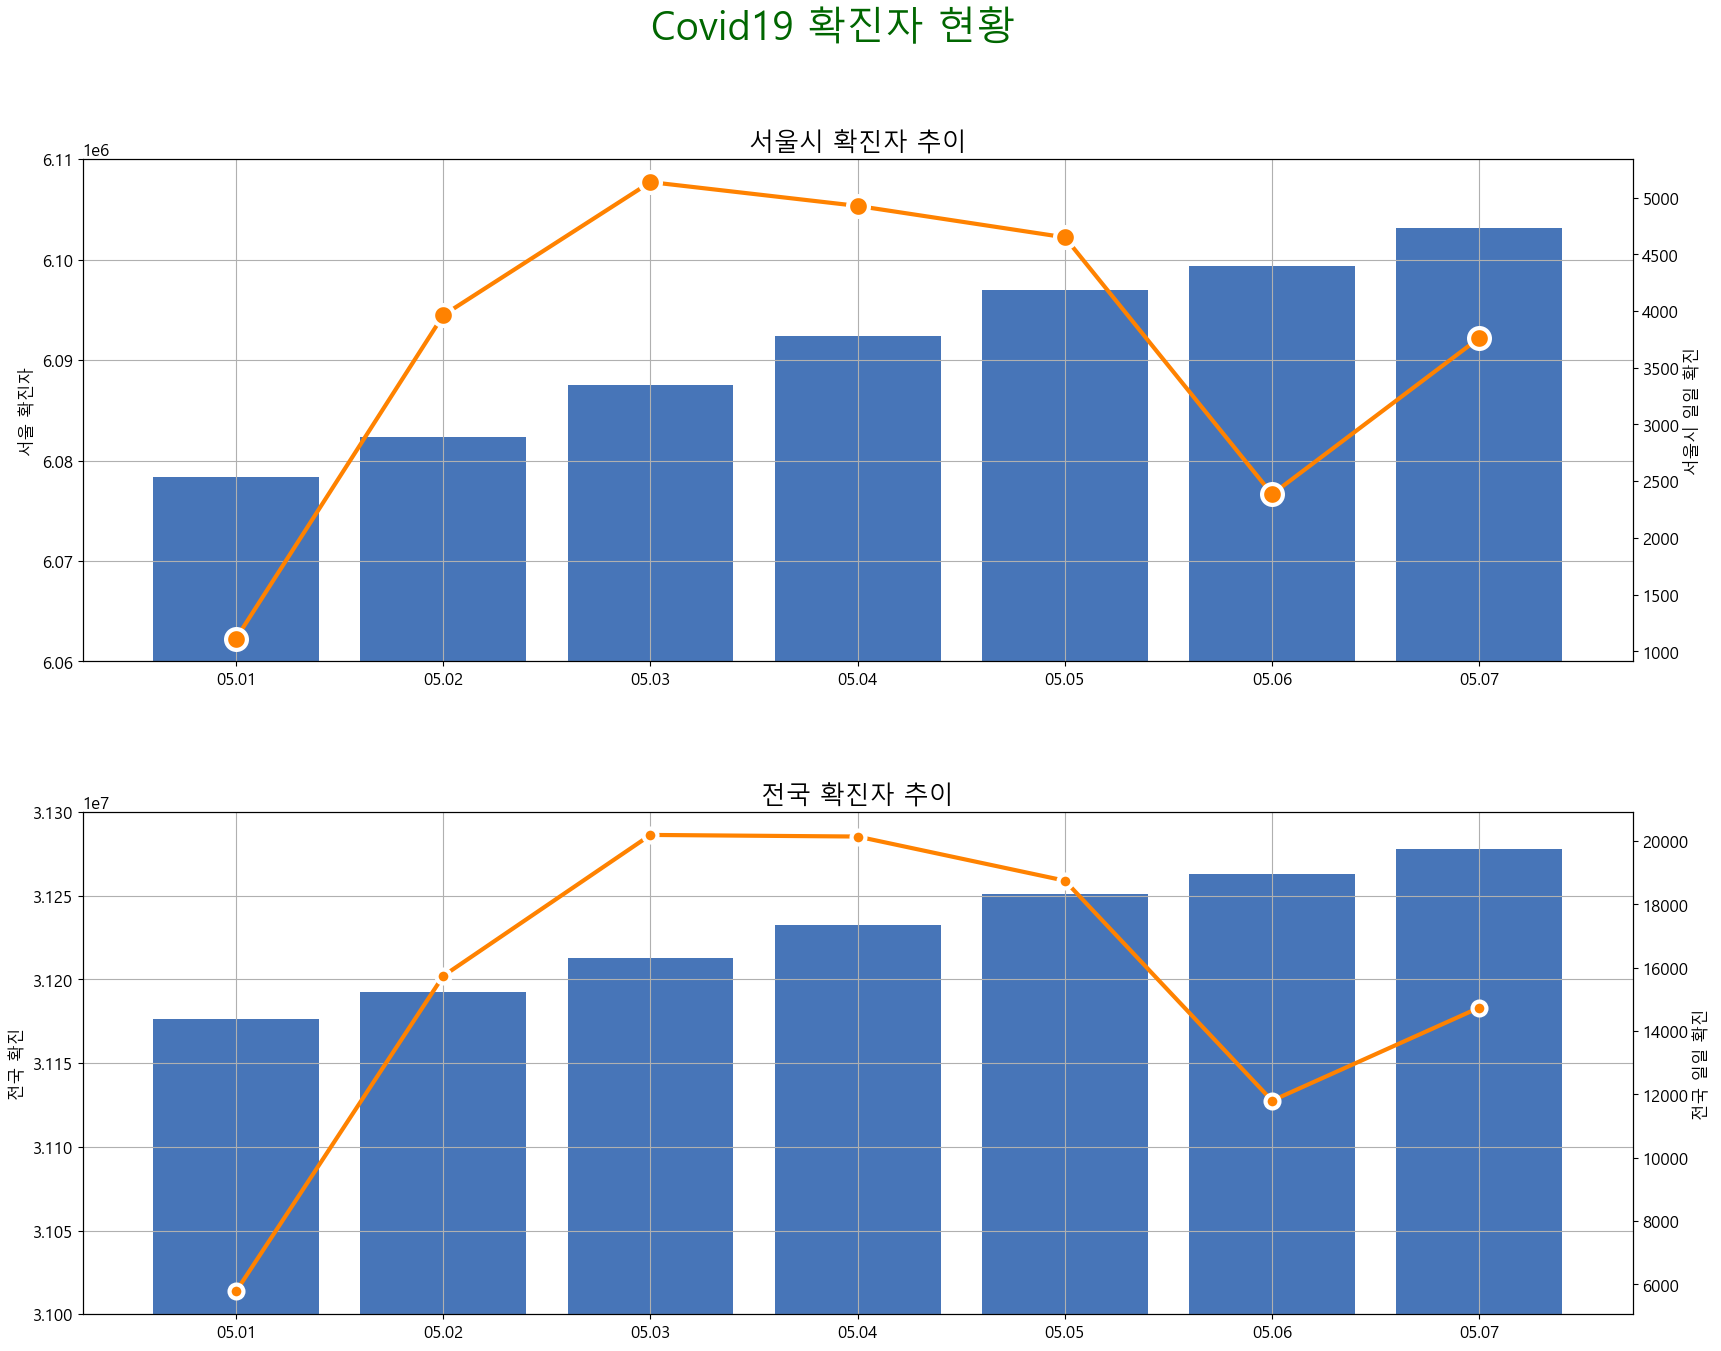

In [17]:
# 2행1열 서브플롯
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 15))

# 각 서브플롯별로 twinx 생성
ax1_right = ax1_left.twinx()
ax2_right = ax2_left.twinx() 



# 전체 제목
fig.suptitle('Covid19 확진자 현황', fontsize=28, color='#006600')

# 각 그래프 간의 세로(hspace) 간격 지정
fig.subplots_adjust(hspace=0.3)

# 첫 번째 왼쪽 그래프
sb.barplot(data=new_data, x=x, y='서울 확진자', color="#3471CB", ax=ax1_left)
ax1_left.grid()
ax1_left.set_title('서울시 확진자 추이', fontsize=18)
ax1_left.set_ylim(6060000, 6110000)
ax1_left.set_xticks(x)
ax1_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 첫 번째 오른쪽 그래프
sb.lineplot(data=new_data, x=x, y='서울시 일일 확진', ax=ax1_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=15, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

# 두 번째 왼쪽 그래프
sb.barplot(data=new_data, x=x, y='전국 확진', color="#3471CB", ax=ax2_left)
ax2_left.grid()
ax2_left.set_title('전국 확진자 추이', fontsize=18)
ax2_left.set_ylim(31000000, 31300000)
ax2_left.set_xticks(x)
ax2_left.set_xticklabels(xticks, fontsize=12, rotation=0)

# 두 번째 오른쪽 그래프
sb.lineplot(data=new_data, x=x, y='전국 일일 확진', ax=ax2_right,
            color="#FF8200", linestyle='-', linewidth=3,
            marker="o", markersize=10, markerfacecolor="#FF8200",
            markeredgecolor="#ffffff", markeredgewidth=3)

plt.show()
plt.close()


NameError: name 'xlabels' is not defined